**Digital Signal Processing using PCA**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Signal Representation
# Assuming a time-domain signal with 3 channels and 100 samples
num_channels = 3
num_samples = 100

# Generate random signal data
signal_data = np.random.randn(num_channels, num_samples)

# Plot the signal data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(signal_data[0], signal_data[1], signal_data[2])
ax.set_xlabel('Channel 1')
ax.set_ylabel('Channel 2')
ax.set_zlabel('Channel 3')
ax.set_title('Original Signal Data')
plt.show()

# Step 2: Matrix Formation
signal_matrix = signal_data

# Step 3: Data Centering
mean_values = np.mean(signal_matrix, axis=1, keepdims=True)
centered_signal_matrix = signal_matrix - mean_values

# Step 4: Principal Component Analysis (PCA)
covariance_matrix = np.cov(centered_signal_matrix)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Step 5: Eigenvalue and Eigenvector Selection
num_components = 2  # Selecting the top 2 components
sorted_indices = np.argsort(eigenvalues)[::-1][:num_components]
selected_eigenvectors = eigenvectors[:, sorted_indices]

# Step 6: Dimensionality Reduction
reduced_signal_matrix = np.dot(selected_eigenvectors.T, centered_signal_matrix)

# Step 7: Reconstruction
reconstructed_signal_matrix = np.dot(selected_eigenvectors, reduced_signal_matrix)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reconstructed_signal_matrix[0], reconstructed_signal_matrix[1], reconstructed_signal_matrix[2])
ax.set_xlabel('Channel 1')
ax.set_ylabel('Channel 2')
ax.set_zlabel('Channel 3')
ax.set_title('Reconstructed Signal Data')
plt.show()

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(signal_data.T)
plt.title('Original Signal Waveforms')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal_matrix.T)
plt.title('Reconstructed Signal Waveforms')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


**Recommender System using SVD**

Top recommendations for user 0:
Item 10: similarity=0.9146586993085374
Item 15: similarity=0.7915704682782589
Item 16: similarity=0.7476005270487126
Item 3: similarity=0.7350072727504073
Item 6: similarity=0.5700392368929005


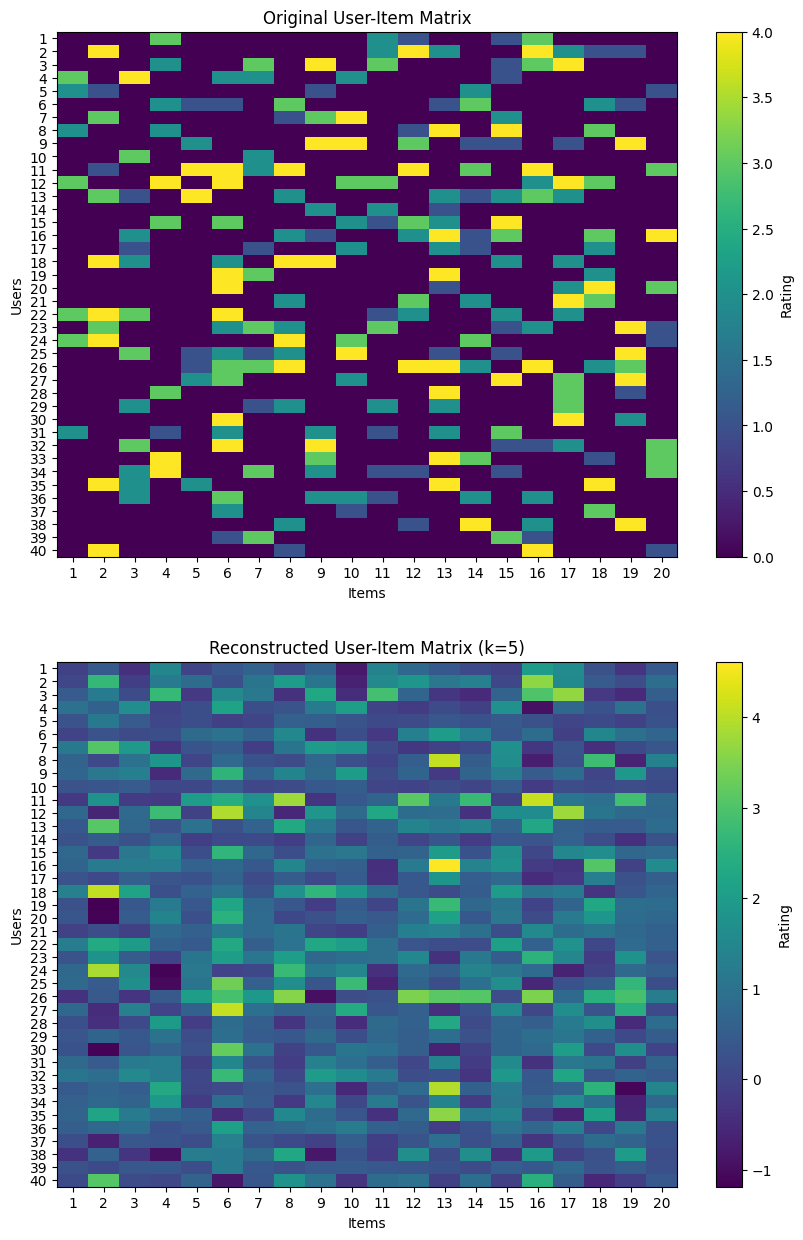

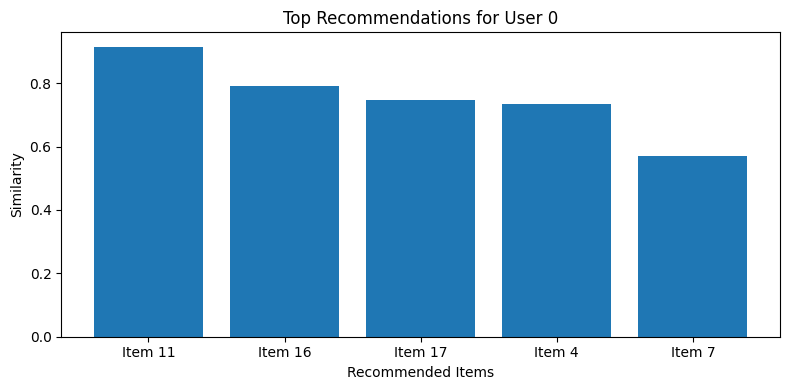

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import random

# STEP 1: Generate a larger example user-item matrix with sparsity
num_users = 40
num_items = 20
sparsity = 0.6
density = 1 - sparsity
matrix = random(num_users, num_items, density=density)
sm = (matrix * 5).astype(int)  # Scale and convert to integer
R = sm.toarray()

# Step 2:Matrix Factorization with SVD
U, sigma, Vt = np.linalg.svd(R, full_matrices=False)

k = 5 # number of latent factors (k)

# STEP 3: Reduce dimensionality to k singular values and vectors and
# STEP 4: Latent Factor Calculation
U_k = U[:, :k]
sigma_k = np.diag(sigma[:k])
Vt_k = Vt[:k, :]

# STEP 5: Generate recommendations for a specific user
user_index = 0
user_latent_repr = U_k[user_index, :]
item_latent_reprs = Vt_k.T

similarities = np.dot(user_latent_repr, item_latent_reprs.T) / (
        np.linalg.norm(user_latent_repr) * np.linalg.norm(item_latent_reprs, axis=1)
)

top_suggestions = np.argsort(similarities)[::-1]

# STEP 6: Rating Prediction Calculate the approximate user-item matrix
R_hat = U_k @ sigma_k @ Vt_k

# Print top 5 recommendations for the user
print(f"Top recommendations for user {user_index}:")
for i in range(5):
    item_index = top_suggestions[i]
    print(f"Item {item_index}: similarity={similarities[item_index]}")

# Plot the original and reconstructed user-item matrices
fig, axes = plt.subplots(2, 1, figsize=(10, 15))
im1 = axes[0].imshow(R, cmap='viridis', interpolation='nearest', aspect='auto')
axes[0].set_title("Original User-Item Matrix")
axes[0].set_xticks(np.arange(num_items))
axes[0].set_yticks(np.arange(num_users))
axes[0].set_xticklabels(np.arange(1, num_items + 1))
axes[0].set_yticklabels(np.arange(1, num_users + 1))
axes[0].set_xlabel('Items')
axes[0].set_ylabel('Users')

im2 = axes[1].imshow(R_hat, cmap='viridis', interpolation='nearest', aspect='auto')
axes[1].set_title(f"Reconstructed User-Item Matrix (k={k})")
axes[1].set_xticks(np.arange(num_items))
axes[1].set_yticks(np.arange(num_users))
axes[1].set_xticklabels(np.arange(1, num_items + 1))
axes[1].set_yticklabels(np.arange(1, num_users + 1))
axes[1].set_xlabel('Items')
axes[1].set_ylabel('Users')

cbar1 = plt.colorbar(im1, ax=axes[0])
cbar1.set_label('Rating')
cbar2 = plt.colorbar(im2, ax=axes[1])
cbar2.set_label('Rating')

plt.figure(figsize=(8, 4))
plt.bar(range(5), similarities[top_suggestions[:5]], align='center')
plt.xticks(range(5), [f"Item {item_index + 1}" for item_index in top_suggestions[:5]])
plt.xlabel('Recommended Items')
plt.ylabel('Similarity')
plt.title(f"Top Recommendations for User {user_index}")

plt.tight_layout()
plt.show()
